In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [2]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
print(f"dimension of diabetes data: {diabetes.shape}")

dimension of diabetes data: (768, 9)


In [6]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


C:\Users\Bhavleen Kaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

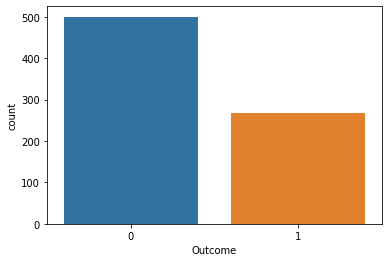

In [7]:
import seaborn as sns
sns.countplot(diabetes['Outcome'],label="Count")

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<ipython-input-24-7cf4bc177fa1>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


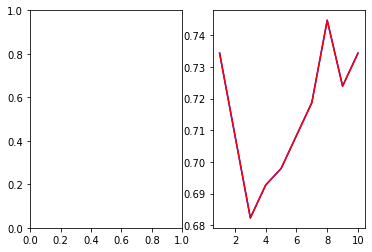

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(diabetes.loc[:,diabetes.columns !='Outcome'],diabetes['Outcome'])
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
# try n_neighbours from 1 to 10
neighbours_settings=range(1,11)
for n_neighbours in neighbours_settings:
    #build the model
    knn=KNeighborsClassifier(n_neighbors=n_neighbours)
    knn.fit(x_train,y_train)
    #record training set accuracy 
    training_accuracy.append(knn.score(x_test,y_test))
    #record test set accuracy 
    test_accuracy.append(knn.score(x_test,y_test))

fig, ax = plt.subplots(1, 2)
ax[0] = plt.plot(neighbours_settings, training_accuracy, c='b')
ax[1] = plt.plot(neighbours_settings,test_accuracy, c='r')
# plt.ylabel("Accuracy")
# plt.xlabel("n_neighbors")
# plt.legend()
fig.show()
# plt.savefig('knn_compare_model')

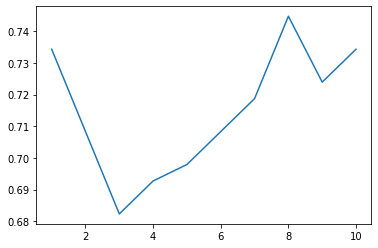

In [25]:
plt.plot(neighbours_settings,training_accuracy,label="training accuracy")

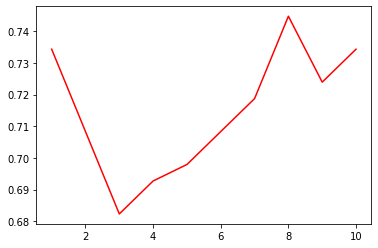

In [26]:
plt.plot(neighbours_settings,test_accuracy, c='r')